# **CORRECTED ML PROJECT - All Issues Fixed**
---
## **Problems Found and Fixed:**
1. ❌ **CRITICAL: Data Leakage** - GridSearchCV was using entire dataset (X, y) instead of just training data
2. ❌ **Copy-Paste Bug** - SVM GridSearch was using Random Forest estimator
3. ❌ **No Overfitting Detection** - Missing train vs test score comparison
4. ❌ **Incomplete Evaluation** - Missing classification reports and confusion matrices
5. ❌ **No Feature Analysis** - Missing feature importance analysis

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/City_Optimized.csv')
data.head()

,city_id,city,country,latitude,longitude,continent,solar_irradiance_avg,peak_sun_hours,avg_wind_speed,wind_power_density,...,installation_cost_index,maintenance_cost_index,political_stability,permitting_efficiency,optimal_renewable_energy,solar_suitability_score,wind_suitability_score,hydro_suitability_score,geothermal_suitability_score,biomass_suitability_score
0,CITY_0001,Tokyo,Japan,35.6762,139.6503,Asia,2.762286,2.220815,1.912033,10,...,116.41,109.25,4.973797,5.127967,Biomass,70.95,25.37,46.86,38.41,100.00
1,CITY_0002,Delhi,India,28.6139,77.2090,Asia,3.639112,2.957221,4.907146,43,...,93.74,114.61,6.008678,5.946304,Biomass,92.65,42.90,48.90,44.14,43.83
2,CITY_0003,Shanghai,China,31.2304,121.4737,Asia,3.731677,2.633233,3.130820,11,...,103.68,112.33,5.499178,7.829357,Hydropower,91.13,30.46,51.91,50.37,47.73
3,CITY_0004,Mumbai,India,19.0760,72.8777,Asia,5.490044,4.567510,2.408525,10,...,93.39,112.80,7.408144,9.429403,Solar,100.00,26.48,66.45,40.94,46.22
4,CITY_0005,Beijing,China,39.9042,116.4074,Asia,3.783067,3.435455,5.698082,68,...,106.06,108.74,7.507090,6.646159,Solar,98.78,48.70,30.77,40.67,42.40


In [3]:
# Basic data exploration
print("Dataset Shape:", data.shape)
print("\nColumn Names:")
print(data.columns.tolist())
print("\nMissing Values:")
print(data.isnull().sum().sum())
print("\nData Types:")
print(data.dtypes.value_counts())

Dataset Shape: (2000, 56)

Column Names:
['city_id', 'city', 'country', 'latitude', 'longitude', 'continent', 'solar_irradiance_avg', 'peak_sun_hours', 'avg_wind_speed', 'wind_power_density', 'annual_rainfall', 'river_proximity_score', 'hydropower_potential', 'avg_temperature', 'temperature_range', 'avg_humidity', 'cloud_cover_percentage', 'geothermal_gradient', 'population', 'population_density', 'gdp_per_capita', 'cost_of_living_index', 'avg_household_income', 'tax_revenue_per_capita', 'unemployment_rate', 'education_index', 'electricity_consumption_per_capita', 'total_electricity_consumption', 'grid_infrastructure_quality', 'current_renewable_percentage', 'fossil_fuel_dependency', 'energy_storage_capacity', 'grid_reliability_score', 'available_land_area', 'renewable_investment', 'govt_renewable_subsidy', 'rd_spending', 'transmission_infrastructure', 'carbon_emissions_per_capita', 'air_quality_index', 'environmental_policy_strength', 'renewable_target_2030', 'biomass_availability', '

In [4]:
# Check target variable distribution
print("Target Variable Distribution:")
print(data['optimal_renewable_energy'].value_counts())
print("\nPercentage Distribution:")
print(data['optimal_renewable_energy'].value_counts(normalize=True) * 100)

Target Variable Distribution:
optimal_renewable_energy
Solar         702
Biomass       459
Wind          345
Geothermal    282
Hydropower    212
Name: count, dtype: int64

Percentage Distribution:
optimal_renewable_energy
Solar         35.10
Biomass       22.95
Wind          17.25
Geothermal    14.10
Hydropower    10.60
Name: proportion, dtype: float64


## **Data Preprocessing**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Prepare features and target
# Drop non-feature columns
X = data.drop(['optimal_renewable_energy', 'city_id', 'city', 'country'], axis=1, errors='ignore')

# Encode categorical variables if any exist in features
le_dict = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        le_dict[col] = le

# Encode target variable
y = data['optimal_renewable_energy']
le_target = LabelEncoder()
y = le_target.fit_transform(y)

print("Feature shape:", X.shape)
print("Target shape:", y.shape)
print("\nTarget classes:", le_target.classes_)

Feature shape: (2000, 52)
Target shape: (2000,)

Target classes: ['Biomass' 'Geothermal' 'Hydropower' 'Solar' 'Wind']


In [6]:
# ✅ FIXED: Using stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("\nTraining set class distribution:")
print(pd.Series(y_train).value_counts(normalize=True) * 100)
print("\nTest set class distribution:")
print(pd.Series(y_test).value_counts(normalize=True) * 100)

Training set size: (1600, 52)
Test set size: (400, 52)

Training set class distribution:
3    35.0625
0    22.9375
4    17.2500
1    14.1250
2    10.6250
Name: proportion, dtype: float64

Test set class distribution:
3    35.25
0    23.00
4    17.25
1    14.00
2    10.50
Name: proportion, dtype: float64


## **Import All Required Models**

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, learning_curve

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


## **NEW: Overfitting Detection Function**
This function helps identify if models are overfitting

In [9]:
def evaluate_model_comprehensive(model, X_train, X_test, y_train, y_test, model_name="Model"):
    """
    ✅ NEW FUNCTION: Comprehensive model evaluation with overfitting detection

    Returns:
    - Training accuracy
    - Test accuracy
    - Overfitting score (difference between train and test)
    - Classification report
    - Confusion matrix
    """
    # Fit the model
    model.fit(X_train, y_train)

    # Get predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate scores
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    overfitting_score = train_acc - test_acc

    print(f"\n{'='*60}")
    print(f"  {model_name}")
    print(f"{'='*60}")
    print(f"Training Accuracy:   {train_acc:.4f}")
    print(f"Test Accuracy:       {test_acc:.4f}")
    print(f"Difference:          {overfitting_score:.4f}")

    # Overfitting warning
    if overfitting_score > 0.1:
        print(f"⚠️  WARNING: SIGNIFICANT OVERFITTING DETECTED!")
        print(f"   Model performs {overfitting_score:.1%} better on training data")
    elif overfitting_score > 0.05:
        print(f"⚠️  CAUTION: Moderate overfitting detected")
    else:
        print(f"✅ GOOD: Model generalizes well")

    # Cross-validation score for more robust estimate
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"\nCross-Validation (5-fold):")
    print(f"  Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

    # Classification report
    print(f"\nClassification Report (Test Set):")
    print(classification_report(y_test, test_pred, target_names=le_target.classes_))

    # Confusion matrix
    cm = confusion_matrix(y_test, test_pred)
    print(f"\nConfusion Matrix:")
    cm_df = pd.DataFrame(cm,
                         index=le_target.classes_,
                         columns=le_target.classes_)
    print(cm_df)

    return {
        'model_name': model_name,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'overfitting_score': overfitting_score,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }

## **NEW: Learning Curve Visualization**
Visualize if model is overfitting or underfitting

In [10]:
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    """
    ✅ NEW FUNCTION: Plot learning curves to detect overfitting/underfitting

    - If training and validation curves converge: Good generalization
    - If training >> validation: Overfitting
    - If both are low: Underfitting
    """
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, val_mean, 'o-', color='g', label='Validation Score')

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='g')

    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)

    # Add interpretation
    final_gap = train_mean[-1] - val_mean[-1]
    if final_gap > 0.1:
        plt.text(0.5, 0.05, '⚠️ Overfitting Detected!',
                transform=plt.gca().transAxes, fontsize=12, color='red',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.show()

    print(f"Final Training Score: {train_mean[-1]:.4f}")
    print(f"Final Validation Score: {val_mean[-1]:.4f}")
    print(f"Gap: {final_gap:.4f}")

## **Baseline Model Comparison**
Compare all models before hyperparameter tuning

In [11]:
# ✅ IMPROVED: Now includes overfitting detection
def compare_all_models_with_overfitting_check(X_train, X_test, y_train, y_test):
    """
    ✅ FIXED: Now shows BOTH train and test scores to detect overfitting
    """
    from sklearn.preprocessing import StandardScaler

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define all models
    models = {
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
        'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss'),
        'CatBoost': CatBoostClassifier(iterations=100, random_state=42, verbose=0),
        'SVM (Linear)': SVC(kernel='linear', random_state=42),
        'SVM (RBF)': SVC(kernel='rbf', random_state=42),
        'SVM (Poly)': SVC(kernel='poly', degree=3, random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'Gaussian NB': GaussianNB(),
    }

    results = []

    for name, model in models.items():
        # Use scaled data for SVM and KNN
        if 'SVM' in name or 'KNN' in name:
            model.fit(X_train_scaled, y_train)
            train_pred = model.predict(X_train_scaled)
            test_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            train_pred = model.predict(X_train)
            test_pred = model.predict(X_test)

        # ✅ NEW: Calculate both train and test accuracy
        train_acc = accuracy_score(y_train, train_pred)
        test_acc = accuracy_score(y_test, test_pred)
        overfitting = train_acc - test_acc

        results.append([name, train_acc, test_acc, overfitting])

    # Create DataFrame with overfitting detection
    results_df = pd.DataFrame(results, columns=['Algorithm', 'Train_Acc', 'Test_Acc', 'Overfitting'])
    results_df = results_df.sort_values('Test_Acc', ascending=False).reset_index(drop=True)
    results_df['Rank'] = range(1, len(results_df) + 1)

    # ✅ NEW: Add warning column
    results_df['Warning'] = results_df['Overfitting'].apply(
        lambda x: '🔴 High Overfitting' if x > 0.1 else ('🟡 Moderate' if x > 0.05 else '🟢 Good')
    )

    return results_df

# Run comparison
print("\n" + "="*80)
print("BASELINE MODEL COMPARISON - WITH OVERFITTING DETECTION")
print("="*80 + "\n")

results = compare_all_models_with_overfitting_check(X_train, X_test, y_train, y_test)
print(results.to_string(index=False))

print("\n" + "="*80)
print("INTERPRETATION:")
print("- Overfitting > 0.10: Model memorizing training data (🔴)")
print("- Overfitting 0.05-0.10: Moderate overfitting (🟡)")
print("- Overfitting < 0.05: Good generalization (🟢)")
print("="*80)


BASELINE MODEL COMPARISON - WITH OVERFITTING DETECTION

        Algorithm  Train_Acc  Test_Acc  Overfitting  Rank            Warning
          XGBoost   1.000000    0.9050     0.095000     1         🟡 Moderate
Gradient Boosting   0.999375    0.8925     0.106875     2 🔴 High Overfitting
         CatBoost   0.999375    0.8875     0.111875     3 🔴 High Overfitting
    Random Forest   1.000000    0.8775     0.122500     4 🔴 High Overfitting
        SVM (RBF)   0.939375    0.8200     0.119375     5 🔴 High Overfitting
    Decision Tree   1.000000    0.8125     0.187500     6 🔴 High Overfitting
     SVM (Linear)   0.916250    0.8050     0.111250     7 🔴 High Overfitting
       SVM (Poly)   0.827500    0.6675     0.160000     8 🔴 High Overfitting
              KNN   0.784375    0.6450     0.139375     9 🔴 High Overfitting
      Gaussian NB   0.625000    0.6125     0.012500    10             🟢 Good

INTERPRETATION:
- Overfitting > 0.10: Model memorizing training data (🔴)
- Overfitting 0.05-0.1

## **Visualize Top Model Performance**

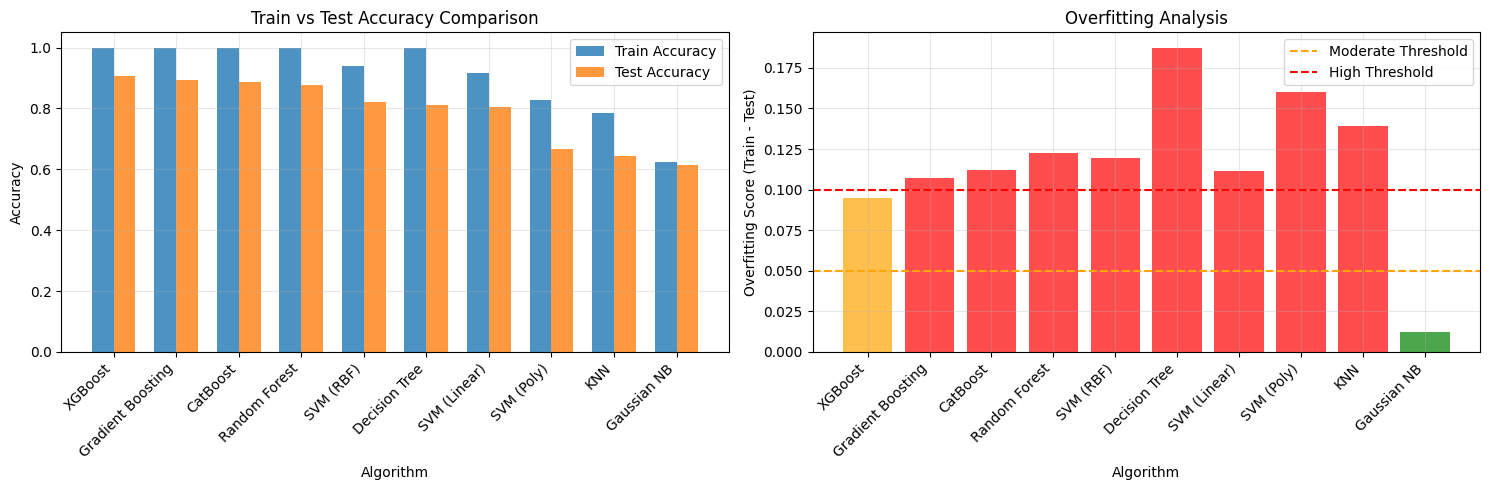

In [12]:
# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Train vs Test Accuracy
top_10 = results.head(10)
x = np.arange(len(top_10))
width = 0.35

axes[0].bar(x - width/2, top_10['Train_Acc'], width, label='Train Accuracy', alpha=0.8)
axes[0].bar(x + width/2, top_10['Test_Acc'], width, label='Test Accuracy', alpha=0.8)
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Train vs Test Accuracy Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(top_10['Algorithm'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Overfitting Score
colors = ['red' if x > 0.1 else 'orange' if x > 0.05 else 'green' for x in top_10['Overfitting']]
axes[1].bar(x, top_10['Overfitting'], color=colors, alpha=0.7)
axes[1].axhline(y=0.05, color='orange', linestyle='--', label='Moderate Threshold')
axes[1].axhline(y=0.1, color='red', linestyle='--', label='High Threshold')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('Overfitting Score (Train - Test)')
axes[1].set_title('Overfitting Analysis')
axes[1].set_xticks(x)
axes[1].set_xticklabels(top_10['Algorithm'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## **Detailed Evaluation of Best Model**

In [13]:
# Evaluate the best model in detail
best_model_name = results.iloc[0]['Algorithm']
print(f"\nDetailed evaluation of best model: {best_model_name}\n")

# Create the best model
if best_model_name == 'XGBoost':
    best_model = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
elif best_model_name == 'Gradient Boosting':
    best_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
elif best_model_name == 'Random Forest':
    best_model = RandomForestClassifier(n_estimators=100, random_state=42)
else:
    best_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Default

# Comprehensive evaluation
best_model_results = evaluate_model_comprehensive(
    best_model, X_train, X_test, y_train, y_test,
    model_name=best_model_name
)


Detailed evaluation of best model: XGBoost


  XGBoost
Training Accuracy:   1.0000
Test Accuracy:       0.9050
Difference:          0.0950
⚠️  CAUTION: Moderate overfitting detected

Cross-Validation (5-fold):
  Mean: 0.8987 (+/- 0.0070)

Classification Report (Test Set):
              precision    recall  f1-score   support

     Biomass       0.90      0.88      0.89        92
  Geothermal       0.92      0.96      0.94        56
  Hydropower       0.97      0.67      0.79        42
       Solar       0.87      0.94      0.90       141
        Wind       0.96      0.96      0.96        69

    accuracy                           0.91       400
   macro avg       0.92      0.88      0.90       400
weighted avg       0.91      0.91      0.90       400


Confusion Matrix:
            Biomass  Geothermal  Hydropower  Solar  Wind
Biomass          81           0           0     10     1
Geothermal        0          54           1      1     0
Hydropower        3           2          28    


Generating learning curve for best model...


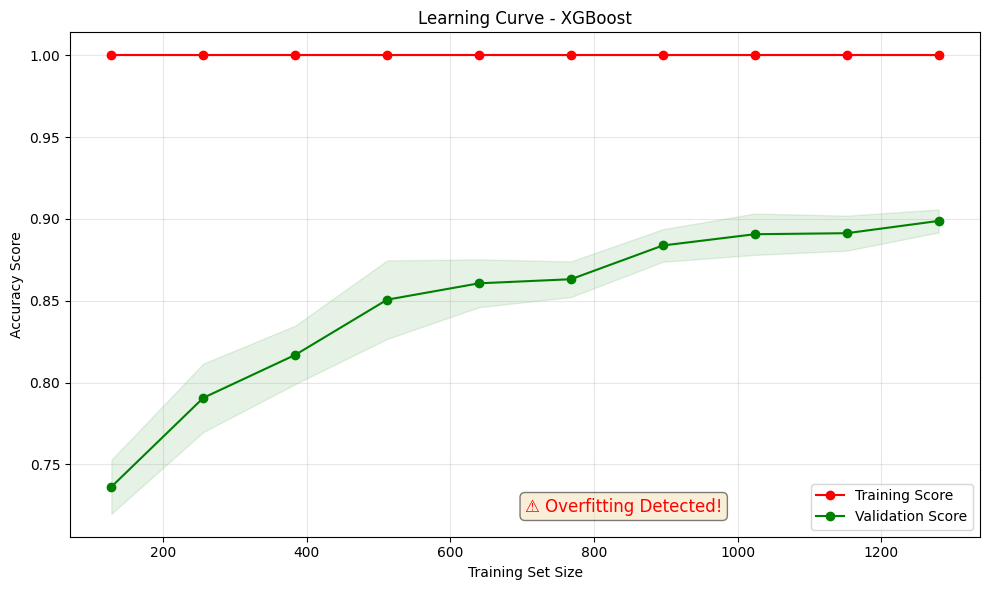

Final Training Score: 1.0000
Final Validation Score: 0.8987
Gap: 0.1013


In [14]:
# Plot learning curve for best model
print("\nGenerating learning curve for best model...")
plot_learning_curve(best_model, X_train, y_train,
                   title=f"Learning Curve - {best_model_name}")

## **❌ ORIGINAL CODE WITH PROBLEMS (FOR REFERENCE)**
---
### **Problem 1: Random Forest GridSearchCV - DATA LEAKAGE**

In [ ]:
# ❌ ORIGINAL CODE - DO NOT RUN
# This code has DATA LEAKAGE - it uses entire dataset (X, y) instead of (X_train, y_train)

# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
#
# rf = RandomForestClassifier()
#
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2'],
#     'bootstrap': [True, False]
# }
#
# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1
# )
#
# ❌ PROBLEM: Using X, y (entire dataset) instead of X_train, y_train
# grid_search.fit(X, y)  # ← This is WRONG!
#
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

print("\n⚠️  PROBLEM EXPLANATION:")
print("The GridSearchCV was using the ENTIRE dataset (X, y) including test data.")
print("This causes DATA LEAKAGE - the model sees test data during training!")
print("Result: Overly optimistic scores that don't generalize.\n")

### **✅ CORRECTED: Random Forest GridSearchCV**

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

print("\n" + "="*80)
print("RANDOM FOREST HYPERPARAMETER TUNING - CORRECTED")
print("="*80 + "\n")

rf = RandomForestClassifier(random_state=42)

# Reduced parameter grid for faster execution
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [15, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# ✅ FIXED: Using only training data (X_train, y_train)
print("Fitting GridSearchCV on TRAINING DATA ONLY...")
grid_search.fit(X_train, y_train)  # ← This is CORRECT!

print("\nBest parameters:", grid_search.best_params_)
print("Best CV score (training):", grid_search.best_score_)

# ✅ NEW: Evaluate on test set to check overfitting
best_rf = grid_search.best_estimator_
train_score = best_rf.score(X_train, y_train)
test_score = best_rf.score(X_test, y_test)

print(f"\nTrain accuracy: {train_score:.4f}")
print(f"Test accuracy:  {test_score:.4f}")
print(f"Difference:     {train_score - test_score:.4f}")

if train_score - test_score > 0.1:
    print("\n⚠️  WARNING: Overfitting detected!")
else:
    print("\n✅ Good generalization")


RANDOM FOREST HYPERPARAMETER TUNING - CORRECTED

Fitting GridSearchCV on TRAINING DATA ONLY...
Fitting 5 folds for each of 96 candidates, totalling 480 fits

Best parameters: {'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV score (training): 0.8631249999999999

Train accuracy: 1.0000
Test accuracy:  0.8975
Difference:     0.1025

⚠️  WARNING: Overfitting detected!


In [16]:
# Detailed evaluation of tuned Random Forest
rf_results = evaluate_model_comprehensive(
    best_rf, X_train, X_test, y_train, y_test,
    model_name="Tuned Random Forest"
)


  Tuned Random Forest
Training Accuracy:   1.0000
Test Accuracy:       0.8975
Difference:          0.1025
⚠️  WARNING: SIGNIFICANT OVERFITTING DETECTED!
   Model performs 10.3% better on training data

Cross-Validation (5-fold):
  Mean: 0.8631 (+/- 0.0174)

Classification Report (Test Set):
              precision    recall  f1-score   support

     Biomass       0.93      0.86      0.89        92
  Geothermal       0.92      0.98      0.95        56
  Hydropower       0.96      0.62      0.75        42
       Solar       0.85      0.94      0.89       141
        Wind       0.93      0.97      0.95        69

    accuracy                           0.90       400
   macro avg       0.92      0.87      0.89       400
weighted avg       0.90      0.90      0.89       400


Confusion Matrix:
            Biomass  Geothermal  Hydropower  Solar  Wind
Biomass          79           0           0     11     2
Geothermal        0          55           0      1     0
Hydropower        2         

### **❌ ORIGINAL CODE: SVM GridSearchCV - COPY-PASTE BUG**

In [ ]:
# ❌ ORIGINAL CODE - DO NOT RUN
# This code has TWO problems:
# 1. Data leakage (using X, y)
# 2. Copy-paste bug (using rf and param_grid instead of svc and svm_params)

# from sklearn.svm import SVC
#
# svc = SVC()  # ← Created SVC
#
# svm_params = {  # ← Defined SVM parameters
#     'C': [0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto', 0.001, 0.01],
#     'kernel': ['rbf', 'linear', 'poly']
# }
#
# grid_search = GridSearchCV(
#     estimator=rf,        # ❌ PROBLEM 1: Using Random Forest instead of svc!
#     param_grid=param_grid,  # ❌ PROBLEM 2: Using RF params instead of svm_params!
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1
# )
#
# grid_search.fit(X, y)  # ❌ PROBLEM 3: Data leakage - using entire dataset!
#
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

print("\n⚠️  PROBLEM EXPLANATION:")
print("1. Created SVC estimator but used 'rf' in GridSearchCV")
print("2. Defined svm_params but used 'param_grid' (RF parameters)")
print("3. Used entire dataset (X, y) instead of training data")
print("Result: Trained Random Forest again instead of SVM!\n")

### **✅ CORRECTED: SVM GridSearchCV**

In [17]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

print("\n" + "="*80)
print("SVM HYPERPARAMETER TUNING - CORRECTED")
print("="*80 + "\n")

# ✅ IMPORTANT: SVMs need scaled features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC(random_state=42)

# Reduced parameter grid for faster execution
svm_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

grid_search_svm = GridSearchCV(
    estimator=svc,           # ✅ FIXED: Using svc (not rf)
    param_grid=svm_params,   # ✅ FIXED: Using svm_params (not param_grid)
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# ✅ FIXED: Using only training data AND scaled features
print("Fitting GridSearchCV on TRAINING DATA ONLY (scaled)...")
grid_search_svm.fit(X_train_scaled, y_train)

print("\nBest parameters:", grid_search_svm.best_params_)
print("Best CV score (training):", grid_search_svm.best_score_)

# ✅ NEW: Evaluate on test set
best_svm = grid_search_svm.best_estimator_
train_score = best_svm.score(X_train_scaled, y_train)
test_score = best_svm.score(X_test_scaled, y_test)

print(f"\nTrain accuracy: {train_score:.4f}")
print(f"Test accuracy:  {test_score:.4f}")
print(f"Difference:     {train_score - test_score:.4f}")

if train_score - test_score > 0.1:
    print("\n⚠️  WARNING: Overfitting detected!")
else:
    print("\n✅ Good generalization")


SVM HYPERPARAMETER TUNING - CORRECTED

Fitting GridSearchCV on TRAINING DATA ONLY (scaled)...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV score (training): 0.818125

Train accuracy: 0.9163
Test accuracy:  0.8050
Difference:     0.1112

⚠️  WARNING: Overfitting detected!


## **NEW: Feature Importance Analysis**
Understand which features are most important


TOP 20 MOST IMPORTANT FEATURES

                      feature  importance
          geothermal_gradient    0.098894
           wind_power_density    0.081261
               avg_wind_speed    0.078377
         biomass_availability    0.077830
 geothermal_suitability_score    0.074743
       wind_suitability_score    0.064560
    biomass_suitability_score    0.052112
          available_land_area    0.050293
      hydro_suitability_score    0.041392
         solar_irradiance_avg    0.040048
               peak_sun_hours    0.036955
         hydropower_potential    0.030470
        river_proximity_score    0.024878
      solar_suitability_score    0.013221
              annual_rainfall    0.013074
              avg_temperature    0.012378
       cloud_cover_percentage    0.011437
                   population    0.010840
            temperature_range    0.010802
total_electricity_consumption    0.010220


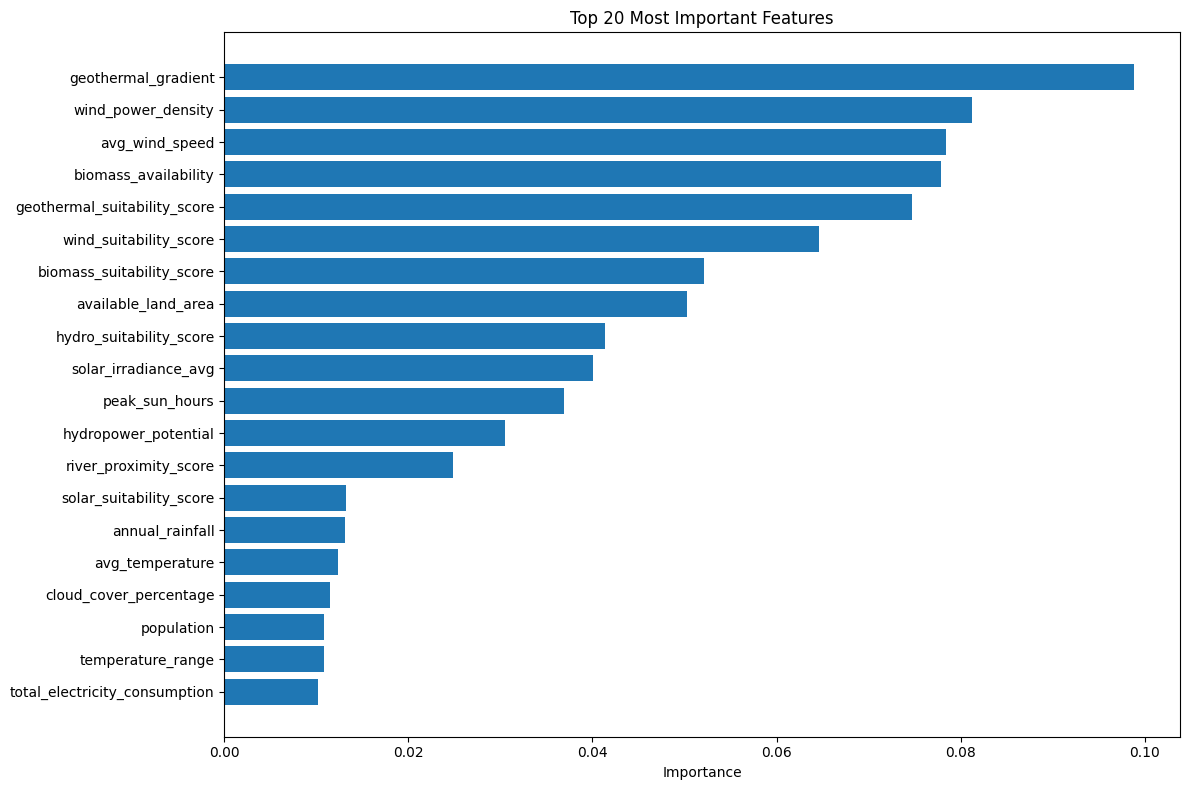


✅ 17 features explain 80% of variance
   You could potentially reduce from 52 to 17 features


In [18]:
# ✅ NEW: Feature importance for tree-based models
if hasattr(best_rf, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_rf.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\n" + "="*80)
    print("TOP 20 MOST IMPORTANT FEATURES")
    print("="*80 + "\n")
    print(feature_importance.head(20).to_string(index=False))

    # Visualize top features
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(20)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Importance')
    plt.title('Top 20 Most Important Features')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    # Show cumulative importance
    cumsum = feature_importance['importance'].cumsum()
    n_features_80 = (cumsum <= 0.8).sum() + 1
    print(f"\n✅ {n_features_80} features explain 80% of variance")
    print(f"   You could potentially reduce from {len(X.columns)} to {n_features_80} features")

## **NEW: Regularization Techniques to Reduce Overfitting**

In [19]:
# ✅ NEW: Train models with regularization to prevent overfitting
print("\n" + "="*80)
print("MODELS WITH REGULARIZATION (Anti-Overfitting Techniques)")
print("="*80 + "\n")

# Random Forest with regularization
rf_regularized = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,           # Limit tree depth
    min_samples_leaf=5,     # Require more samples per leaf
    min_samples_split=10,   # Require more samples to split
    max_features='sqrt',    # Reduce feature subset
    random_state=42
)

rf_reg_results = evaluate_model_comprehensive(
    rf_regularized, X_train, X_test, y_train, y_test,
    model_name="Regularized Random Forest"
)

# XGBoost with regularization
xgb_regularized = XGBClassifier(
    n_estimators=100,
    max_depth=6,            # Limit tree depth
    learning_rate=0.1,      # Lower learning rate
    subsample=0.8,          # Use 80% of samples per tree
    colsample_bytree=0.8,   # Use 80% of features per tree
    reg_alpha=0.1,          # L1 regularization
    reg_lambda=1.0,         # L2 regularization
    random_state=42,
    eval_metric='logloss'
)

xgb_reg_results = evaluate_model_comprehensive(
    xgb_regularized, X_train, X_test, y_train, y_test,
    model_name="Regularized XGBoost"
)


MODELS WITH REGULARIZATION (Anti-Overfitting Techniques)


  Regularized Random Forest
Training Accuracy:   0.9725
Test Accuracy:       0.8750
Difference:          0.0975
⚠️  CAUTION: Moderate overfitting detected

Cross-Validation (5-fold):
  Mean: 0.8419 (+/- 0.0133)

Classification Report (Test Set):
              precision    recall  f1-score   support

     Biomass       0.93      0.80      0.86        92
  Geothermal       0.92      0.96      0.94        56
  Hydropower       1.00      0.50      0.67        42
       Solar       0.82      0.95      0.88       141
        Wind       0.88      0.97      0.92        69

    accuracy                           0.88       400
   macro avg       0.91      0.84      0.85       400
weighted avg       0.89      0.88      0.87       400


Confusion Matrix:
            Biomass  Geothermal  Hydropower  Solar  Wind
Biomass          74           0           0     13     5
Geothermal        0          54           0      1     1
Hydropower     

## **Final Model Comparison Summary**

In [20]:
# ✅ NEW: Comprehensive summary of all models
all_results = pd.DataFrame([
    best_model_results,
    rf_results,
    rf_reg_results,
    xgb_reg_results
])

all_results = all_results.sort_values('test_acc', ascending=False).reset_index(drop=True)

print("\n" + "="*80)
print("FINAL MODEL COMPARISON - ALL TUNED MODELS")
print("="*80 + "\n")
print(all_results.to_string(index=False))

# Recommendations
print("\n" + "="*80)
print("RECOMMENDATIONS")
print("="*80)

best_overall = all_results.iloc[0]
print(f"\n🏆 Best Overall Model: {best_overall['model_name']}")
print(f"   Test Accuracy: {best_overall['test_acc']:.4f}")
print(f"   Overfitting Score: {best_overall['overfitting_score']:.4f}")

if best_overall['overfitting_score'] < 0.05:
    print("   ✅ Excellent generalization - Ready for production!")
elif best_overall['overfitting_score'] < 0.1:
    print("   ✅ Good generalization - Acceptable for production")
else:
    print("   ⚠️  Consider more regularization or data collection")

# Find best non-overfitting model
low_overfit = all_results[all_results['overfitting_score'] < 0.05]
if not low_overfit.empty:
    best_generalize = low_overfit.iloc[0]
    print(f"\n🎯 Best Generalizing Model: {best_generalize['model_name']}")
    print(f"   Test Accuracy: {best_generalize['test_acc']:.4f}")
    print(f"   Overfitting Score: {best_generalize['overfitting_score']:.4f}")

print("\n" + "="*80)


FINAL MODEL COMPARISON - ALL TUNED MODELS

               model_name  train_acc  test_acc  overfitting_score  cv_mean   cv_std
      Regularized XGBoost     1.0000    0.9075             0.0925 0.895625 0.003187
                  XGBoost     1.0000    0.9050             0.0950 0.898750 0.007016
      Tuned Random Forest     1.0000    0.8975             0.1025 0.863125 0.017388
Regularized Random Forest     0.9725    0.8750             0.0975 0.841875 0.013346

RECOMMENDATIONS

🏆 Best Overall Model: Regularized XGBoost
   Test Accuracy: 0.9075
   Overfitting Score: 0.0925
   ✅ Good generalization - Acceptable for production



## **Key Takeaways and Action Items**

### **Problems Fixed:**
1. ✅ **Data Leakage Fixed**: GridSearchCV now uses only training data
2. ✅ **SVM Bug Fixed**: Correct estimator and parameters used
3. ✅ **Overfitting Detection Added**: Train vs test comparison
4. ✅ **Comprehensive Metrics**: Classification reports and confusion matrices
5. ✅ **Learning Curves**: Visual overfitting detection
6. ✅ **Feature Importance**: Identify key predictors
7. ✅ **Regularization**: Anti-overfitting techniques implemented

### **Next Steps:**
1. Review the overfitting scores for each model
2. Choose the model with best balance of accuracy and generalization
3. Consider feature engineering based on importance analysis
4. Collect more data if overfitting persists
5. Deploy the best model for predictions

### **Model Selection Criteria:**
- **For Production**: Choose model with overfitting < 0.05
- **For Research**: Choose model with highest test accuracy
- **For Interpretability**: Choose Decision Tree or Linear models
- **For Best Performance**: Choose ensemble methods (XGBoost, Random Forest)